# **PROBLEMA DE NEGOCIO**

El phishing se ha convertido en una de las amenazas cibernéticas más peligrosas y costosas a nivel mundial. Durante 2024, los ataques de phishing aumentaron un 202% en comparación con el año anterior, resultando en pérdidas económicas que alcanzaron los $70 millones de dólares solo en Estados Unidos, un incremento del 274% respecto a 2023. Este delito cibernético es el punto de partida del 91% de todos los ciberataques y está presente en el 36% de las violaciones de datos. La situación se ha agravado con el uso de inteligencia artificial por parte de los criminales, quienes han sofisticado sus técnicas haciendo que el 67.4% de los ataques de phishing en 2024 utilizaran alguna forma de IA, dificultando su detección incluso para usuarios experimentados. Personas cercanas han sido víctimas recientes de estos fraudes, perdiendo dinero y datos personales, lo que evidencia la urgencia de desarrollar soluciones tecnológicas efectivas que protejan a los usuarios de estas amenazas en constante evolución.

# **OBJETIVO GENERAL**

**CONTEXTO COMERCIAL**

El objetivo principal de este proyecto es desarrollar un sistema inteligente de detección de correos electrónicos de phishing utilizando técnicas avanzadas de Procesamiento de Lenguaje Natural (NLP) y Deep Learning. El sistema analizará automáticamente el contenido de los correos electrónicos (asunto y cuerpo) para clasificarlos como legítimos o fraudulentos, proporcionando una capa adicional de protección para los usuarios. Este modelo servirá como backend de una solución integral que incluirá una aplicación frontend y una extensión de navegador Chrome, permitiendo alertar a los usuarios en tiempo real sobre posibles intentos de fraude. Con esta herramienta tecnológica, se busca combatir activamente a los criminales cibernéticos, reducir las pérdidas económicas causadas por phishing y proteger la información personal de los usuarios, contribuyendo así a un ecosistema digital más seguro

# **ORIGEN DE LOS DATOS**


El conjunto de datos utilizado en este trabajo proviene del repositorio público de Kaggle, en el siguiente enlace:

https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset

Este dataset  

#**DEFINICIÓN DE LAS VARIABLES**
>* `subject (texto)`: asunto del correo.

>* `body (texto libre)`: contenido del correo.

>* `label (categórica, texto)`: es la variable objetivo. Clasifica si fue o no un correo de phishing (0 para legítimo, 1 para phishing).

# **LIBRERÍAS A UTILIZAR**




# **0.PRE ETAPA 1 Y 2**




# *0.1 Importación de librerías para trabajar*


In [26]:
#Instalando librerías necesarias
!pip install kaggle
!pip install kagglehub
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_news_s


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✘ No compatible package found for 'en_core_news_s' (spaCy v3.8.11)



In [ ]:
# Importando librerías necesarias

# Manipulación de datos
import kagglehub
import pandas as pd

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


# NLP Procesamiento de texto
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab') #remueve puntuaciones y caracteres especiales
nltk.download('stopwords') #remueve las stop words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') #para lematización
from collections import Counter
import spacy #para hacer NER

# Machine Learning clásico
from sklearn.model_selection import train_test_split #Para dividir en test y train los datos
from sklearn.feature_extraction.text import TfidfVectorizer #Pasa el texto a números
from sklearn.linear_model import LogisticRegression #modelo de ML clásico con salida binaria
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Otros
import re #Para expresiones regulares

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Descarganbdo el dataset, usando el API de Kaggle para faciliar
path = kagglehub.dataset_download("naserabdullahalam/phishing-email-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'phishing-email-dataset' dataset.
Path to dataset files: /kaggle/input/phishing-email-dataset


In [ ]:

# Importando el dataset
df = pd.read_csv(f'{path}/Enron.csv')

df.head(10)

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0
5,hpl nom for may 31 2001,( see attached file : hplno 531 . xls )\r\n- h...,0
6,# 9760,tried to get fancy with your address and it ca...,0
7,"hpl noms for february 15 , 2000",( see attached file : hplo 215 . xls )\r\n- hp...,0
8,fw : pooling contract template,- - - - - original message - - - - -\r\nfrom :...,0
9,"hpl nom for march 28 , 2000",( see attached file : hplo 328 . xls )\r\n- hp...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  29569 non-null  object
 1   body     29767 non-null  object
 2   label    29767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 697.8+ KB


In [ ]:
print(df.dtypes)

subject    object
body       object
label       int64
dtype: object


In [ ]:
print(df['label'].unique())

[0 1]


In [ ]:
print(df[['body', 'subject']].isnull().sum())

body         0
subject    198
dtype: int64


Vemos que la variable o feature "subject" tiene 198 datos faltantes o NaN. Consideré eliminarlos inicialmente, dado que igual hay miles de datos más. Sin embargo, si llega a ocurrir que un asunto vacío está correlacionado con la probabilidad de que sea phishing o no, entonces estaría perdiendo información valiosa. Por ello, y para evitar que se generen errores al aplicar expresiones regulares, convertiré los datos faltantes a cadenas de texto vacías



In [ ]:
#Haciendo lo que menciono anteriormente
#inplace=True modifica el df original y ahorra tiempo
df['body'].fillna('', inplace=True)
df['subject'].fillna('', inplace=True)

/tmp/ipython-input-2028090082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].fillna('', inplace=True)
/tmp/ipython-input-2028090082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [ ]:
print(df[['body', 'subject']].isnull().sum())

body       0
subject    0
dtype: int64


# **1. Desarrollo - ETAPA 1**

Voy a usar expresiones regulares para quitar signos de puntuación y caracteres especiales. Por ejemplo hay un body que incluye un texto como "- - - - - - - - - - - - - - - - - - - - - - fo", donde los guiones no aportan nada. Esta expresión regular me sirve para eliminarlos

In [ ]:
#Vamos a quitar los signos de putuación
#OJO: esto dio mal resultado. Lo dejé para propósitos de aprendizaje
#Pero tuve que volver a hacerlo en celdas posteriores
import re

def clean_text(text):
    """
    Si el texto es un string, aplica la regex para quitar caracteres especiales y signos de puntuación. De lo contrario devuelve una cadena vacía
    """
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = ''
    return text


#Creando una nueva columna con los cambios del subject y pasandola a minúsculas
df['cleaned_subject'] = df['subject'].apply(clean_text).str.lower()

#Creando una nueva columna con los cambios del body y pasandola a minúsculas de una vez
df['cleaned_body'] = df['body'].apply(clean_text).str.lower()






In [ ]:
df.head(15)

,subject,body,label,cleaned_subject,cleaned_body
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0,hpl nom for may 25 2001,see attached file hplno 525 xls \r\n hplno ...
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0,re nom actual vols for 24 th,forwarded by sabrae zaja...
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0,enron actuals for march 30 april 1 201,estimated actuals\r\nmarch 30 2001\r\nno flow...
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0,hpl nom for may 30 2001,see attached file hplno 530 xls \r\n hplno ...
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0,hpl nom for june 1 2001,see attached file hplno 601 xls \r\n hplno ...
5,hpl nom for may 31 2001,( see attached file : hplno 531 . xls )\r\n- h...,0,hpl nom for may 31 2001,see attached file hplno 531 xls \r\n hplno ...
6,# 9760,tried to get fancy with your address and it ca...,0,9760,tried to get fancy with your address and it ca...
7,"hpl noms for february 15 , 2000",( see attached file : hplo 215 . xls )\r\n- hp...,0,hpl noms for february 15 2000,see attached file hplo 215 xls \r\n hplo 21...
8,fw : pooling contract template,- - - - - original message - - - - -\r\nfrom :...,0,fw pooling contract template,original message \r\nfrom christineh...
9,"hpl nom for march 28 , 2000",( see attached file : hplo 328 . xls )\r\n- hp...,0,hpl nom for march 28 2000,see attached file hplo 328 xls \r\n hplo 32...


In [ ]:
#Tokenizar
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['tokens_body'] = df['cleaned_body'].apply(word_tokenize)
df['tokens_subject'] = df['cleaned_subject'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Hago este Display, para ver los tokens que creó. Muestro el dataframe con sólo dos columnas para ver antes y después

In [ ]:
display(df[['body','cleaned_body', 'tokens_body','cleaned_subject','tokens_subject']].head())

,body,cleaned_body,tokens_body,cleaned_subject,tokens_subject
0,( see attached file : hplno 525 . xls )\r\n- h...,see attached file hplno 525 xls \r\n hplno ...,"[see, attached, file, hplno, 525, xls, hplno, ...",hpl nom for may 25 2001,"[hpl, nom, for, may, 25, 2001]"
1,- - - - - - - - - - - - - - - - - - - - - - fo...,forwarded by sabrae zaja...,"[forwarded, by, sabrae, zajac, hou, ect, on, 0...",re nom actual vols for 24 th,"[re, nom, actual, vols, for, 24, th]"
2,"estimated actuals\r\nmarch 30 , 2001\r\nno flo...",estimated actuals\r\nmarch 30 2001\r\nno flow...,"[estimated, actuals, march, 30, 2001, no, flow...",enron actuals for march 30 april 1 201,"[enron, actuals, for, march, 30, april, 1, 201]"
3,( see attached file : hplno 530 . xls )\r\n- h...,see attached file hplno 530 xls \r\n hplno ...,"[see, attached, file, hplno, 530, xls, hplno, ...",hpl nom for may 30 2001,"[hpl, nom, for, may, 30, 2001]"
4,( see attached file : hplno 601 . xls )\r\n- h...,see attached file hplno 601 xls \r\n hplno ...,"[see, attached, file, hplno, 601, xls, hplno, ...",hpl nom for june 1 2001,"[hpl, nom, for, june, 1, 2001]"


Aquí vamos ahora a remover stop words. Palabras como "the", "el", etc. Estas generan ruido y quitarlas permite hacer un proceso más eficiente

In [ ]:
#Aquí vamos ahora a remover stop words

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # Download the stopwords corpus

stop_words = set(stopwords.words('english'))  # Usamos inglés

def remove_stopwords(words):
    """
    Función para solo retornar palabras que NO estén en el set de stop_words
    """
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    return filtered_words

df['tokens_subject_sin_stopwords'] = df['tokens_subject'].apply(remove_stopwords)
df['tokens_body_sin_stopwords'] = df['tokens_body'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
display(df.head(10))

,subject,body,label,cleaned_subject,cleaned_body,tokens_body,tokens_subject,tokens_subject_sin_stopwords,tokens_body_sin_stopwords
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0,hpl nom for may 25 2001,see attached file hplno 525 xls \r\n hplno ...,"[see, attached, file, hplno, 525, xls, hplno, ...","[hpl, nom, for, may, 25, 2001]","[hpl, nom, may, 25, 2001]","[see, attached, file, hplno, 525, xls, hplno, ..."
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0,re nom actual vols for 24 th,forwarded by sabrae zaja...,"[forwarded, by, sabrae, zajac, hou, ect, on, 0...","[re, nom, actual, vols, for, 24, th]","[nom, actual, vols, 24, th]","[forwarded, sabrae, zajac, hou, ect, 05, 30, 2..."
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0,enron actuals for march 30 april 1 201,estimated actuals\r\nmarch 30 2001\r\nno flow...,"[estimated, actuals, march, 30, 2001, no, flow...","[enron, actuals, for, march, 30, april, 1, 201]","[enron, actuals, march, 30, april, 1, 201]","[estimated, actuals, march, 30, 2001, flow, ma..."
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0,hpl nom for may 30 2001,see attached file hplno 530 xls \r\n hplno ...,"[see, attached, file, hplno, 530, xls, hplno, ...","[hpl, nom, for, may, 30, 2001]","[hpl, nom, may, 30, 2001]","[see, attached, file, hplno, 530, xls, hplno, ..."
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0,hpl nom for june 1 2001,see attached file hplno 601 xls \r\n hplno ...,"[see, attached, file, hplno, 601, xls, hplno, ...","[hpl, nom, for, june, 1, 2001]","[hpl, nom, june, 1, 2001]","[see, attached, file, hplno, 601, xls, hplno, ..."
5,hpl nom for may 31 2001,( see attached file : hplno 531 . xls )\r\n- h...,0,hpl nom for may 31 2001,see attached file hplno 531 xls \r\n hplno ...,"[see, attached, file, hplno, 531, xls, hplno, ...","[hpl, nom, for, may, 31, 2001]","[hpl, nom, may, 31, 2001]","[see, attached, file, hplno, 531, xls, hplno, ..."
6,# 9760,tried to get fancy with your address and it ca...,0,9760,tried to get fancy with your address and it ca...,"[tried, to, get, fancy, with, your, address, a...",[9760],[9760],"[tried, get, fancy, address, came, back, forwa..."
7,"hpl noms for february 15 , 2000",( see attached file : hplo 215 . xls )\r\n- hp...,0,hpl noms for february 15 2000,see attached file hplo 215 xls \r\n hplo 21...,"[see, attached, file, hplo, 215, xls, hplo, 21...","[hpl, noms, for, february, 15, 2000]","[hpl, noms, february, 15, 2000]","[see, attached, file, hplo, 215, xls, hplo, 21..."
8,fw : pooling contract template,- - - - - original message - - - - -\r\nfrom :...,0,fw pooling contract template,original message \r\nfrom christineh...,"[original, message, from, christinehauk, txu, ...","[fw, pooling, contract, template]","[fw, pooling, contract, template]","[original, message, christinehauk, txu, com, m..."
9,"hpl nom for march 28 , 2000",( see attached file : hplo 328 . xls )\r\n- hp...,0,hpl nom for march 28 2000,see attached file hplo 328 xls \r\n hplo 32...,"[see, attached, file, hplo, 328, xls, hplo, 32...","[hpl, nom, for, march, 28, 2000]","[hpl, nom, march, 28, 2000]","[see, attached, file, hplo, 328, xls, hplo, 32..."


Ahora vamos a hacer algo de lematización o stemming.

Stemming: busca dejar cada palabra en su base, muchas veces quitando partes para bsucar su raiz. Ej: correr puede volverse "corr"

Lematización: busca el "lema" de la palabra y devuelve normalmente una palabra de diccionario.

En este caso prefiero usar lematización, para poder entender más fácilmente los resultados de forma humana. También, si le doy estos resultados a un LLM en el futuro, el lema aportará más contexto, que una raíz basada en stemming.



In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Inicializando el lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_words(words):
    """
    Esta función toma las palabras de la celda y las lematiza. Devuelve una lista con los "lemas"
    """
    lemmatized_words = []
    for word in words:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    return lemmatized_words

# Creando nuevas columnas. Ayuda a ver todos los cambios
df['tokens_lemmatizados_body'] = df['tokens_body_sin_stopwords'].apply(lemmatize_words)
df['tokens_lemmatizados_subject'] = df['tokens_subject_sin_stopwords'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


En este momento del proyecto decidí ver los datos completos en vez de truncados.

por ello usé:

```
pd.set_option('display.max_colwidth', None)
```
Lo cual le dio un formato a la función head()


In [ ]:
pd.set_option('display.max_colwidth', None)

display(df.head(5))

,subject,body,label,cleaned_subject,cleaned_body,tokens_body,tokens_subject,tokens_subject_sin_stopwords,tokens_body_sin_stopwords,tokens_lemmatizados_body,tokens_lemmatizados_subject
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls,0,hpl nom for may 25 2001,see attached file hplno 525 xls \r\n hplno 525 xls,"[see, attached, file, hplno, 525, xls, hplno, 525, xls]","[hpl, nom, for, may, 25, 2001]","[hpl, nom, may, 25, 2001]","[see, attached, file, hplno, 525, xls, hplno, 525, xls]","[see, attached, file, hplno, 525, xl, hplno, 525, xl]","[hpl, nom, may, 25, 2001]"
1,re : nom / actual vols for 24 th,"- - - - - - - - - - - - - - - - - - - - - - forwarded by sabrae zajac / hou / ect on 05 / 30 / 2001 12 : 07 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nenron capital & trade resources corp . from : "" eileen ponton "" 05 / 29 / 2001 08 : 37 am\r\nto : davilal @ txu . com , cstonel @ txu . com , mjones 7 @ txu . com , hpl . scheduling @ enron . com , liz . bellamy @ enron . com , szajac @ enron . com\r\ncc :\r\nsubject : re : nom / actual vols for 24 th\r\ni will agree with your nomination of 33 . 750\r\n- - - - - forwarded by eileen ponton / houston / pefs / pec on 05 / 29 / 01 08 : 36 am\r\n- - - - -\r\n"" charlie\r\nstone "" to : "" eileen ponton ""\r\n, "" melissa jones ""\r\ncom > , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\n05 / 25 / 01 subject : re : nom / actual vols for 24 th\r\n04 : 23 pm\r\nwe do not agree with the "" nominated "" volume .\r\nour records reflect the following nom . schedule .\r\n30 rate , eff . 0900 hrs through hour beginning 1400 hrs .\r\n6 . 250\r\n60 rate , eff . 1400 hrs through hour beginning 1700 hrs .\r\n7 . 500\r\n30 rate , eff . 1700 hrs through hour beginning 0900 hrs .\r\n20 . 000\r\ntotal nominated 33 . 750\r\nplease review your source data and let us know if you agree with the above .\r\nthanks ,\r\nccs\r\n"" eileen ponton "" on 05 / 25 / 2001 04 : 06 : 50 pm\r\nto : david avila / lsp / enserch / us @ tu , charlie stone / energy / txu @ tu , melissa\r\njones / energy / txu @ tu , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\ncc :\r\nsubject : nom / actual vols for 24 th\r\nnom mcf mmbtu\r\n27 , 500 33 , 109 34 , 003",0,re nom actual vols for 24 th,forwarded by sabrae zajac hou ect on 05 30 2001 12 07 pm \r\nenron capital trade resources corp from eileen ponton 05 29 2001 08 37 am\r\nto davilal txu com cstonel txu com mjones 7 txu com hpl scheduling enron com liz bellamy enron com szajac enron com\r\ncc \r\nsubject re nom actual vols for 24 th\r\ni will agree with your nomination of 33 750\r\n forwarded by eileen ponton houston pefs pec on 05 29 01 08 36 am\r\n \r\n charlie\r\nstone to eileen ponton \r\n melissa jones \r\ncom hpl scheduling enron com liz bellamy enron com \r\nszajac enron com\r\n05 25 01 subject re nom actual vols for 24 th\r\n04 23 pm\r\nwe do not agree with the nominated volume \r\nour records reflect the following nom schedule \r\n30 rate eff 0900 hrs through hour beginning 1400 hrs \r\n6 250\r\n60 rate eff 1400 hrs through hour beginning 1700 hrs \r\n7 500\r\n30 rate eff 1700 hrs through hour beginning 0900 hrs \r\n20 000\r\ntotal nominated 33 750\r\nplease review your source data and let us know if you agree with the above \r\nthanks \r\nccs\r\n eileen ponton on 05 25 2001 04 06 50 pm\r\nto david avila lsp enserch us tu charlie stone energy txu tu melissa\r\njones energy txu tu hpl scheduling enron com liz bellamy enron com \r\nszajac enron com\r\ncc \r\nsubject nom actual vols for 24 th\r\nnom mcf mmbtu\r\n27 500 33 109 34 003,"[forwarded, by, sabrae, zajac, hou, ect, on, 05, 30, 2001, 12, 07, pm, enron, capital, trade, resources, corp, from, eileen, ponton, 05, 29, 2001, 08, 37, am, to, davilal, txu, com, cstonel, txu, com, mjones, 7, txu, com, hpl, scheduling, enron, com, liz, bellamy, enron, com, szajac, enron, com, cc, s

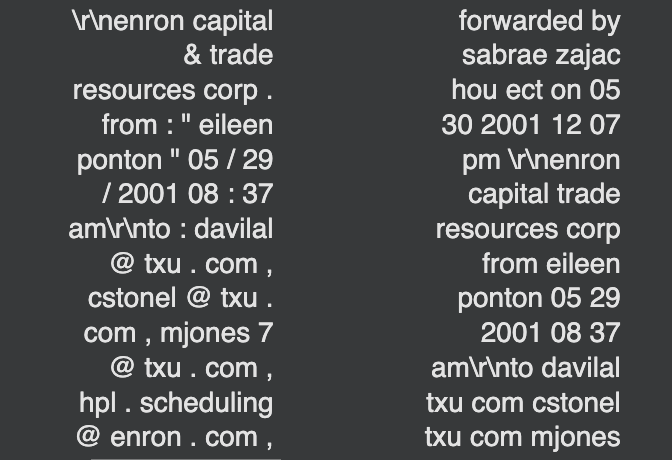

Como se observa en la imagen anterior, me di cuenta que la parte del código que había quitado caracteres especiales, de hecho quitó correos. El preproceso quedó mal hecho. En un proyecto donde se busca predecir si una comunicación es phishing o no, un correo o dominio de correo podría ser una variable que influya en la clasificación. Quitarlo es un error. Por lo cual, a continuación lo hice de nuevo y utilicé IA para usar funciones Regex que hagan el trabajo y que de otra forma no conocería.

In [ ]:
#Aquí me apoyé de IA en diferentes iteraciones para probar con expresiones regulares, hasta que encontré el resultado que quería
import re

def clean_text_preserving_emails(text):
    if not isinstance(text, str):
        return ''

    # Dictionary to store mapping from placeholder to original email
    placeholder_to_email = {}
    placeholder_counter = 0
    placeholder_prefix = "__EMAIL_PLACEHOLDER__"

    # Step 1: First pass to normalize email addresses that might contain spaces
    # This pattern now allows spaces within the username part and removes them.
    # It also handles spaces around the @ and .
    email_space_fix_pattern = r'\b([\w._%+-]+(?:\s[\w._%+-]+)*)\s*@\s*([\w.-]+(?:\s[\w.-]+)*)\s*\.\s*([a-zA-Z]{2,})\b'

    def normalize_spacey_emails(match):
        # Remove all spaces from captured parts before reconstructing
        user_part = re.sub(r'\s', '', match.group(1))
        domain_part = re.sub(r'\s', '', match.group(2))
        tld_part = re.sub(r'\s', '', match.group(3))
        return f"{user_part}@{domain_part}.{tld_part}"

    text_normalized_emails = re.sub(email_space_fix_pattern, normalize_spacey_emails, text)

    # Step 2: Replace strict (now normalized) email addresses with unique placeholders using a callback
    strict_email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

    def replace_email_with_placeholder(match):
        nonlocal placeholder_counter
        email_str = match.group(0)
        placeholder = f'{placeholder_prefix}{placeholder_counter}'
        placeholder_to_email[placeholder] = email_str # Map placeholder to original email
        placeholder_counter += 1
        return placeholder

    text_with_placeholders = re.sub(strict_email_pattern, replace_email_with_placeholder, text_normalized_emails)

    # Step 3: Clean the rest of the text (remove non-alphanumeric and non-whitespace)
    # Since emails are now protected by placeholders (which are \w characters), this regex is safe.
    cleaned_text_with_placeholders = re.sub(r'[^\w\s]', '', text_with_placeholders)

    # Step 4: Restore the original email addresses from the placeholders using a callback
    def restore_placeholder_with_email(match):
        placeholder = match.group(0)
        return placeholder_to_email.get(placeholder, placeholder) # Use .get for safety

    # Fix SyntaxWarning by using a raw f-string for the regex part
    final_cleaned_text = re.sub(rf'{placeholder_prefix}\d+', restore_placeholder_with_email, cleaned_text_with_placeholders)

    return final_cleaned_text.lower() # Optionally convert to lowercase here

# Apply the improved function to the DataFrame columns
df['cleaned_body_new'] = df['body'].apply(clean_text_preserving_emails)
df['cleaned_subject_new'] = df['subject'].apply(clean_text_preserving_emails)

# Display the results to compare
display(df[['body', 'cleaned_body', 'cleaned_body_new']].head())

,body,cleaned_body,cleaned_body_new
0,( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls,see attached file hplno 525 xls \r\n hplno 525 xls,see attached file hplno 525 xls \r\n hplno 525 xls
1,"- - - - - - - - - - - - - - - - - - - - - - forwarded by sabrae zajac / hou / ect on 05 / 30 / 2001 12 : 07 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nenron capital & trade resources corp . from : "" eileen ponton "" 05 / 29 / 2001 08 : 37 am\r\nto : davilal @ txu . com , cstonel @ txu . com , mjones 7 @ txu . com , hpl . scheduling @ enron . com , liz . bellamy @ enron . com , szajac @ enron . com\r\ncc :\r\nsubject : re : nom / actual vols for 24 th\r\ni will agree with your nomination of 33 . 750\r\n- - - - - forwarded by eileen ponton / houston / pefs / pec on 05 / 29 / 01 08 : 36 am\r\n- - - - -\r\n"" charlie\r\nstone "" to : "" eileen ponton ""\r\n, "" melissa jones ""\r\ncom > , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\n05 / 25 / 01 subject : re : nom / actual vols for 24 th\r\n04 : 23 pm\r\nwe do not agree with the "" nominated "" volume .\r\nour records reflect the following nom . schedule .\r\n30 rate , eff . 0900 hrs through hour beginning 1400 hrs .\r\n6 . 250\r\n60 rate , eff . 1400 hrs through hour beginning 1700 hrs .\r\n7 . 500\r\n30 rate , eff . 1700 hrs through hour beginning 0900 hrs .\r\n20 . 000\r\ntotal nominated 33 . 750\r\nplease review your source data and let us know if you agree with the above .\r\nthanks ,\r\nccs\r\n"" eileen ponton "" on 05 / 25 / 2001 04 : 06 : 50 pm\r\nto : david avila / lsp / enserch / us @ tu , charlie stone / energy / txu @ tu , melissa\r\njones / energy / txu @ tu , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\ncc :\r\nsubject : nom / actual vols for 24 th\r\nnom mcf mmbtu\r\n27 , 500 33 , 109 34 , 003",forwarded by sabrae zajac hou ect on 05 30 2001 12 07 pm \r\nenron capital trade resources corp from eileen ponton 05 29 2001 08 37 am\r\nto davilal txu com cstonel txu com mjones 7 txu com hpl scheduling enron com liz bellamy enron com szajac enron com\r\ncc \r\nsubject re nom actual vols for 24 th\r\ni will agree with your nomination of 33 750\r\n forwarded by eileen ponton houston pefs pec on 05 29 01 08 36 am\r\n \r\n charlie\r\nstone to eileen ponton \r\n melissa jones \r\ncom hpl scheduling enron com liz bellamy enron com \r\nszajac enron com\r\n05 25 01 subject re nom actual vols for 24 th\r\n04 23 pm\r\nwe do not agree with the nominated volume \r\nour records reflect the following nom schedule \r\n30 rate eff 0900 hrs through hour beginning 1400 hrs \r\n6 250\r\n60 rate eff 1400 hrs through hour beginning 1700 hrs \r\n7 500\r\n30 rate eff 1700 hrs through hour beginning 0900 hrs \r\n20 000\r\ntotal nominated 33 750\r\nplease review your source data and let us know if you agree with the above \r\nthanks \r\nccs\r\n eileen ponton on 05 25 2001 04 06 50 pm\r\nto david avila lsp enserch us tu charlie stone energy txu tu melissa\r\njones energy txu tu hpl scheduling enron com liz bellamy enron com \r\nszajac enron com\r\ncc \r\nsubject nom actual vols for 24 th\r\nnom mcf mmbtu\r\n27 500 33 109 34 003,forwarded by sabrae zajac hou ect on 05 30 2001 12 07 pm \r\nenron capital trade resources corp from eileen ponton 05 29 2001 08 37 am\r\nto davilal@txu.com cstonel@txu.com mjones7@txu.com hpl.scheduling@enron.com liz.bellamy@enron.com szajac@enron.com\r\ncc \r\nsubject re nom actual vols for 24 th\r\ni will agree with your nomination of 33 750\r\n forwarded by eileen ponton houston pefs pec on 05 29 01 08 36 am\r\n \r\n charlie\r\nstone to eileen ponton \r\n melissa jones \r\ncom hpl.scheduling@enron.com liz.bellamy@enron.com \r\nszajac@enron.com\r\n05 25 01 subject re nom actual vols for 24 th\r\n04 23 pm\r\nwe do not agree with the nominated volume \r\nour records reflect the following nom schedule \r\n30 rate eff 0900 hrs through hour beginning 1400 hrs \r\n6 250\r

Ahora que ya encontré un tratammiento de los correos y los asuntos, que no daña las direcciones de correo, reemplazaré la columna nueva, por la que tenía originalmente

In [ ]:

df['cleaned_body'] = df['cleaned_body_new']


df['cleaned_subject'] = df['cleaned_subject_new']

# Quita las columnas temporales '_new'
df.drop(columns=['cleaned_body_new', 'cleaned_subject_new'], inplace=True)

display(df[['body', 'cleaned_body', 'subject', 'cleaned_subject']].head())

,body,cleaned_body,subject,cleaned_subject
0,( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls,see attached file hplno 525 xls \r\n hplno 525 xls,"hpl nom for may 25 , 2001",hpl nom for may 25 2001
1,"- - - - - - - - - - - - - - - - - - - - - - forwarded by sabrae zajac / hou / ect on 05 / 30 / 2001 12 : 07 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nenron capital & trade resources corp . from : "" eileen ponton "" 05 / 29 / 2001 08 : 37 am\r\nto : davilal @ txu . com , cstonel @ txu . com , mjones 7 @ txu . com , hpl . scheduling @ enron . com , liz . bellamy @ enron . com , szajac @ enron . com\r\ncc :\r\nsubject : re : nom / actual vols for 24 th\r\ni will agree with your nomination of 33 . 750\r\n- - - - - forwarded by eileen ponton / houston / pefs / pec on 05 / 29 / 01 08 : 36 am\r\n- - - - -\r\n"" charlie\r\nstone "" to : "" eileen ponton ""\r\n, "" melissa jones ""\r\ncom > , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\n05 / 25 / 01 subject : re : nom / actual vols for 24 th\r\n04 : 23 pm\r\nwe do not agree with the "" nominated "" volume .\r\nour records reflect the following nom . schedule .\r\n30 rate , eff . 0900 hrs through hour beginning 1400 hrs .\r\n6 . 250\r\n60 rate , eff . 1400 hrs through hour beginning 1700 hrs .\r\n7 . 500\r\n30 rate , eff . 1700 hrs through hour beginning 0900 hrs .\r\n20 . 000\r\ntotal nominated 33 . 750\r\nplease review your source data and let us know if you agree with the above .\r\nthanks ,\r\nccs\r\n"" eileen ponton "" on 05 / 25 / 2001 04 : 06 : 50 pm\r\nto : david avila / lsp / enserch / us @ tu , charlie stone / energy / txu @ tu , melissa\r\njones / energy / txu @ tu , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\ncc :\r\nsubject : nom / actual vols for 24 th\r\nnom mcf mmbtu\r\n27 , 500 33 , 109 34 , 003",forwarded by sabrae zajac hou ect on 05 30 2001 12 07 pm \r\nenron capital trade resources corp from eileen ponton 05 29 2001 08 37 am\r\nto davilal@txu.com cstonel@txu.com mjones7@txu.com hpl.scheduling@enron.com liz.bellamy@enron.com szajac@enron.com\r\ncc \r\nsubject re nom actual vols for 24 th\r\ni will agree with your nomination of 33 750\r\n forwarded by eileen ponton houston pefs pec on 05 29 01 08 36 am\r\n \r\n charlie\r\nstone to eileen ponton \r\n melissa jones \r\ncom hpl.scheduling@enron.com liz.bellamy@enron.com \r\nszajac@enron.com\r\n05 25 01 subject re nom actual vols for 24 th\r\n04 23 pm\r\nwe do not agree with the nominated volume \r\nour records reflect the following nom schedule \r\n30 rate eff 0900 hrs through hour beginning 1400 hrs \r\n6 250\r\n60 rate eff 1400 hrs through hour beginning 1700 hrs \r\n7 500\r\n30 rate eff 1700 hrs through hour beginning 0900 hrs \r\n20 000\r\ntotal nominated 33 750\r\nplease review your source data and let us know if you agree with the above \r\nthanks \r\nccs\r\n eileen ponton on 05 25 2001 04 06 50 pm\r\nto david avila lsp enserch us tu charlie stone energy txu tu melissa\r\njones energy txu tu hpl.scheduling@enron.com liz.bellamy@enron.com \r\nszajac@enron.com\r\ncc \r\nsubject nom actual vols for 24 th\r\nnom mcf mmbtu\r\n27 500 33 109 34 003,re : nom / actual vols for 24 th,re nom actual vols for 24 th
2,"estimated actuals\r\nmarch 30 , 2001\r\nno flow\r\nmarch 31 , 2001\r\nno flow\r\napril 1 , 2001\r\nteco tap 35 . 000\r\nwhen i receive the actuals from duke i will forward them to you .",estimated actuals\r\nmarch 30 2001\r\nno flow\r\nmarch 31 2001\r\nno flow\r\napril 1 2001\r\nteco tap 35 000\r\nwhen i receive the actuals from duke i will forward them to you,"enron actuals for march 30 - april 1 , 201",enron actuals for march 30 april 1 201
3,( see attached file : hplno 530 . xls )\r\n- hplno 530 . xls,see attached file hplno 530 xls \r\n hplno 530 xls,"hpl nom for may 30 , 2001",hpl nom for may 30 2001
4,( see attached file : hplno 601 . xls )\r\n- hplno 601 . xls,see attached file hplno 601 xls



Después de que cambié estas celdas, lo queharé es volver a las celdas anteriores y repetir la tokenizacion, eliminación de stop words y la lematización.

In [ ]:
display(df.head())

,subject,body,label,cleaned_subject,cleaned_body,tokens_body,tokens_subject,tokens_subject_sin_stopwords,tokens_body_sin_stopwords,tokens_lemmatizados_body,tokens_lemmatizados_subject
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls,0,hpl nom for may 25 2001,see attached file hplno 525 xls \r\n hplno 525 xls,"[see, attached, file, hplno, 525, xls, hplno, 525, xls]","[hpl, nom, for, may, 25, 2001]","[hpl, nom, may, 25, 2001]","[see, attached, file, hplno, 525, xls, hplno, 525, xls]","[see, attached, file, hplno, 525, xl, hplno, 525, xl]","[hpl, nom, may, 25, 2001]"
1,re : nom / actual vols for 24 th,"- - - - - - - - - - - - - - - - - - - - - - forwarded by sabrae zajac / hou / ect on 05 / 30 / 2001 12 : 07 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nenron capital & trade resources corp . from : "" eileen ponton "" 05 / 29 / 2001 08 : 37 am\r\nto : davilal @ txu . com , cstonel @ txu . com , mjones 7 @ txu . com , hpl . scheduling @ enron . com , liz . bellamy @ enron . com , szajac @ enron . com\r\ncc :\r\nsubject : re : nom / actual vols for 24 th\r\ni will agree with your nomination of 33 . 750\r\n- - - - - forwarded by eileen ponton / houston / pefs / pec on 05 / 29 / 01 08 : 36 am\r\n- - - - -\r\n"" charlie\r\nstone "" to : "" eileen ponton ""\r\n, "" melissa jones ""\r\ncom > , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\n05 / 25 / 01 subject : re : nom / actual vols for 24 th\r\n04 : 23 pm\r\nwe do not agree with the "" nominated "" volume .\r\nour records reflect the following nom . schedule .\r\n30 rate , eff . 0900 hrs through hour beginning 1400 hrs .\r\n6 . 250\r\n60 rate , eff . 1400 hrs through hour beginning 1700 hrs .\r\n7 . 500\r\n30 rate , eff . 1700 hrs through hour beginning 0900 hrs .\r\n20 . 000\r\ntotal nominated 33 . 750\r\nplease review your source data and let us know if you agree with the above .\r\nthanks ,\r\nccs\r\n"" eileen ponton "" on 05 / 25 / 2001 04 : 06 : 50 pm\r\nto : david avila / lsp / enserch / us @ tu , charlie stone / energy / txu @ tu , melissa\r\njones / energy / txu @ tu , hpl . scheduling @ enron . com , liz . bellamy @ enron . com ,\r\nszajac @ enron . com\r\ncc :\r\nsubject : nom / actual vols for 24 th\r\nnom mcf mmbtu\r\n27 , 500 33 , 109 34 , 003",0,re nom actual vols for 24 th,forwarded by sabrae zajac hou ect on 05 30 2001 12 07 pm \r\nenron capital trade resources corp from eileen ponton 05 29 2001 08 37 am\r\nto davilal@txu.com cstonel@txu.com mjones7@txu.com hpl.scheduling@enron.com liz.bellamy@enron.com szajac@enron.com\r\ncc \r\nsubject re nom actual vols for 24 th\r\ni will agree with your nomination of 33 750\r\n forwarded by eileen ponton houston pefs pec on 05 29 01 08 36 am\r\n \r\n charlie\r\nstone to eileen ponton \r\n melissa jones \r\ncom hpl.scheduling@enron.com liz.bellamy@enron.com \r\nszajac@enron.com\r\n05 25 01 subject re nom actual vols for 24 th\r\n04 23 pm\r\nwe do not agree with the nominated volume \r\nour records reflect the following nom schedule \r\n30 rate eff 0900 hrs through hour beginning 1400 hrs \r\n6 250\r\n60 rate eff 1400 hrs through hour beginning 1700 hrs \r\n7 500\r\n30 rate eff 1700 hrs through hour beginning 0900 hrs \r\n20 000\r\ntotal nominated 33 750\r\nplease review your source data and let us know if you agree with the above \r\nthanks \r\nccs\r\n eileen ponton on 05 25 2001 04 06 50 pm\r\nto david avila lsp enserch us tu charlie stone energy txu tu melissa\r\njones energy txu tu hpl.scheduling@enron.com liz.bellamy@enron.com \r\nszajac@enron.com\r\ncc \r\nsubject nom actual vols for 24 th\r\nnom mcf mmbtu\r\n27 500 33 109 34 003,"[forwarded, by, sabrae, zajac, hou, ect, on, 05, 30, 2001, 12, 07, pm, enron, capital, trade, resources, corp, from, eileen, ponton, 05, 29, 2001, 08, 37, am, to, davilal, txu, com, cstonel, txu, com, mjones, 7, txu, com, hpl, scheduling, enron, com, liz, bellamy, enron, com, szajac, enron, com, cc, su

/tmp/ipython-input-364756528.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frecuencias_entidades_df, x='Tipo_Entidad', y='Frecuencia', palette='viridis')


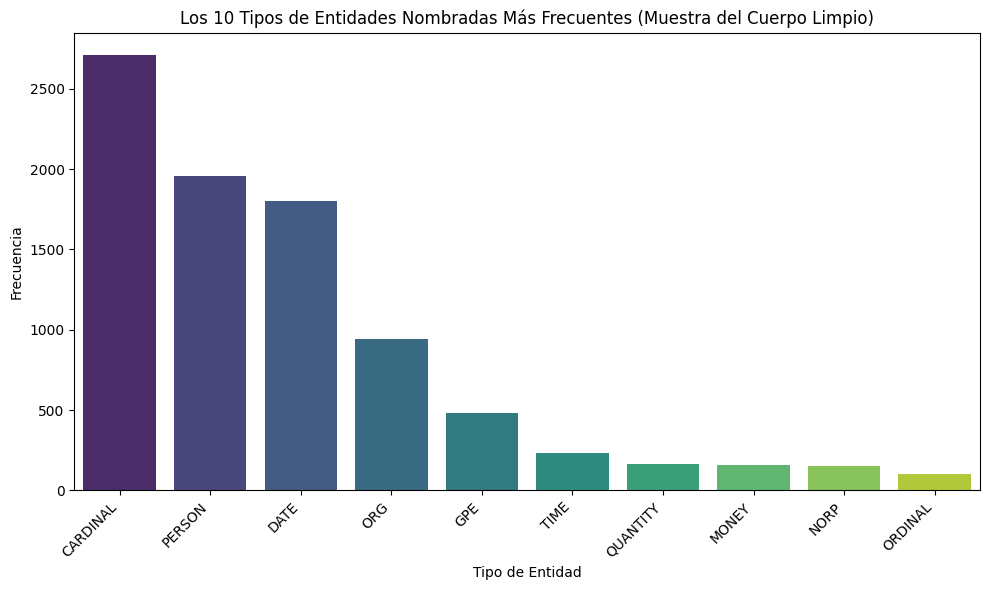

,Tipo_Entidad,Frecuencia
0,CARDINAL,2713
1,PERSON,1955
2,DATE,1803
3,ORG,943
4,GPE,479
5,TIME,231
6,QUANTITY,166
7,MONEY,159
8,NORP,154
9,ORDINAL,105


In [ ]:
#NER mejor hecho

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")  # Modelo en inglés


# Lista para almacenar etiquetas de entidades
entidad_labels = []

# Usando una muestra para evitar tiempos de procesamiento muy largos
tamano_muestra = min(500, df['cleaned_body'].dropna().shape[0])

# Iterando a través de una muestra de cleaned_body y extrayendo tipos de entidades

for text in df['cleaned_body'].dropna().sample(tamano_muestra, random_state=42):
    # Procesando el texto con el modelo spaCy cargado
    doc_email_procesado = nlp(text)
    # Agregar a la lista el atributo label_ de cada entidad
    entidad_labels.extend([ent.label_ for ent in doc_email_procesado.ents])

# Contar las entidades más frecuentes
top_frecuencias_entidades_df = pd.DataFrame(Counter(entidad_labels).most_common(10), columns=['Tipo_Entidad', 'Frecuencia'])

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=top_frecuencias_entidades_df, x='Tipo_Entidad', y='Frecuencia', palette='viridis')
plt.title('Los 10 Tipos de Entidades Nombradas Más Frecuentes (Muestra del Cuerpo Limpio)')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right') # Se rotan etiquetas para una mejor legibilidad
plt.tight_layout()
plt.show()

display(top_frecuencias_entidades_df)


### ¿Qué es TF-IDF?

**TF-IDF** significa "Term Frequency-Inverse Document Frequency" (Frecuencia de Término-Frecuencia Inversa de Documento). Es una medida estadística que refleja la importancia de una palabra para un documento en una colección o corpus.

Se calcula con dos componentes:

1.  **Term Frequency (TF) - Frecuencia de Término**: Mide la frecuencia con la que una palabra aparece en un documento. Si una palabra aparece muchas veces en un documento, es probable que sea importante para ese documento.
    $TF(t,d) = \frac{\text{Número de veces que el término } t \text{ aparece en el documento } d}{\text{Número total de términos en el documento } d}$

2.  **Inverse Document Frequency (IDF) - Frecuencia Inversa de Documento**: Mide la importancia de la palabra en todo el corpus. Si una palabra aparece en muchos documentos, es menos probable que sea una palabra clave para un documento específico (como "el", "la", "y"). Si aparece en pocos documentos, su importancia es mayor.
    $IDF(t,D) = \log\left(\frac{\text{Número total de documentos en el corpus } D}{\text{Número de documentos que contienen el término } t}\right)$

Finalmente, el valor TF-IDF se calcula multiplicando ambos:

$TFIDF(t,d,D) = TF(t,d) \times IDF(t,D)$

En resumen, TF-IDF asigna un valor alto a palabras que son frecuentes en un documento específico, pero no tan frecuentes en la mayoría de los demás documentos. Esto ayuda a resaltar palabras que son más relevantes y distintivas para el contenido de un documento.

# **2. Desarrollo - ETAPA 2**

In [ ]:
#Entendiendo TF-IDF (Esta celda es s´lo explicativa)
# Librería necesaria para TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializando el vectorizador TF-IDF
# ngram_range: Permite considerar palabras individuales (1,1) y pares de palabras (1,2) como features.
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, # max_features: Limita el número de palabras (features) a considerar.
    stop_words='english', #elimina palabras comunes que no aportan mucho significad
    min_df=5,  #min_df: Ignora términos que aparecen en menos de 5 documentos (útil para eliminar ruido)
    ngram_range=(1,2) #Permite considerar palabras individuales (1,1) y pares de palabras (1,2) como features.
)

# Se ajusta el vectorizador a los bodies de los correos limpios y transformarlos en features TF-IDF
# Se usa .astype(str) para asegurar que todos los valores sean strings, evitando posibles errores con datos faltantes.
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_body'].astype(str))

#Para mostrar la forma de la matriz TF-IDF (número de documentos, número de features)
print(f"Forma de la matriz TF-IDF: {tfidf_features.shape}")

print("Algunos nombres de features (palabras/n-gramas):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


## *Aplicando Machine Learning clásico*

In [ ]:
#Librarías están ya importadas. Pero las coloco aquí para claridad mía
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#1. División de datos en conjuntos de entrenamiento y prueba
# "cleaned_body" serán las características (X) y 'label' nuestra variable objetivo (y)
# stratify=df['label'] para asegurar que las proporciones de las clases de 'label' sean las mismas en ambos conjuntos

X_text = df['cleaned_body'].astype(str) # Aseguramos que los textos sean strings
y_labels = df['label']

X_train_text, X_test_text, y_train_labels, y_test_labels = train_test_split(
    X_text, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print(f"Tamaño del conjunto de entrenamiento: {X_train_text.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test_text.shape[0]} muestras")

# 2. Vectorización de texto con TF-IDF(convierte texto a números)
# Inicializando el TfidfVectorizer con parámetros claros y específicos
# max_features: Limita el vocabulario a 5000 de las palabras/n-gramas más frecuentes
# ngram_range: Incluye unigramas (palabras individuales) y bigramas (pares de palabras)
# min_df: Ignora términos que aparecen en menos de 5 documentos
tfidf_vectorizer_model = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    stop_words='english' # Eliminamos palabras comunes en inglés
)

# Ajustar el vectorizador SOLO al conjunto de entrenamiento y transformar ambos conjuntos
X_train_tfidf_features = tfidf_vectorizer_model.fit_transform(X_train_text)
X_test_tfidf_features = tfidf_vectorizer_model.transform(X_test_text)

print(f"Forma de las características TF-IDF de entrenamiento: {X_train_tfidf_features.shape}")
print(f"Forma de las características TF-IDF de prueba: {X_test_tfidf_features.shape}")

#REGRESION LOGISTICA
# 3. Entrenamiento del modelo de Regresión Logística. Porque es sencillo y binario en clasificación
# inicializando el modelo de Regresión Logística
# max_iter: Número máximo de iteraciones para que el algoritmo converja
# n_jobs=-1: Utiliza todos los procesadores disponibles para acelerar el entrenamiento
logistic_regression_model = LogisticRegression(max_iter=200, n_jobs=-1)

# Ahora si entrenanmos el modelo con las características TF-IDF de entrenamiento y las etiquetas
logistic_regression_model.fit(X_train_tfidf_features, y_train_labels)

# 4Predicciones en el conjunto de prueba 
# predicciones sobre las características TF-IDF del conjunto de prueba
phishing_predictions = logistic_regression_model.predict(X_test_tfidf_features)

# 5. Evaluación del modelo 
# exactitud del modelo
accuracy = accuracy_score(y_test_labels, phishing_predictions)
print(f"\nExactitud del modelo de Regresión Logística: {accuracy:.3f}")

# informe de clasificación (precisión, recall, f1-score por clase)
print("\nInforme de Clasificación:")
print(classification_report(y_test_labels, phishing_predictions, digits=3))

# 6. Visualización de la matriz de confusión 
# Calculando la matriz de confusión
confusion_mat = confusion_matrix(y_test_labels, phishing_predictions, labels=y_labels.unique())

#  matriz de confusión usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legítimo (0)', 'Phishing (1)'],
            yticklabels=['Legítimo (0)', 'Phishing (1)'])
plt.xlabel('Etiqueta Predicha'); plt.ylabel('Etiqueta Real');
plt.title('Matriz de Confusión – TF-IDF + Regresión Logística')
plt.show()


## *Aplicando Deep Learning*
Dado que este es un proyecto de NLP en el cual el orden importa y dado que en mi opinión, las stop words pueden ser relevantes(es mi supuesto), usaré embeddings en vez de TF-IDF. 

Para realizar esto es necezario utilizar un tokenizer diferente al que utilicé previamente y que dividía las frases en palabras. En este caso, el tokenizer de Keras crea un diccionario de palabras y las convierte en vectores de numeros. Esto le permite realizar operaciones matematicas con las frases. Y por ende entender que "urgente" es similar a "importante", por ejemplo. 

Usaré la columna cleaned_body para entrenar el modelo. Esta columna fue previamente procesada para eliminar simbolos con regex. 


In [30]:
#Estan importadas al inicio, pero volverlas a poner me ayuda a entender mejor
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X = df['cleaned_body'].astype(str) #usamos la columna del texto limpio de caracteres especiales
y = df['label']

#1 Proceso típico de train test de los datos, para poder evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Tokenización 
max_vocab_size = 10000  # Solo nos quedamos con las 10000 palabras más frecuentes
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>") 
tokenizer.fit_on_texts(X_train) 

# 3. Convertir texto a secuencias numéricas
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 4. Padding (es que todos los textos sean igual de largos)
max_length = 100 
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# 5. Ahora si viene el modelo de DEEP LEARNING
embedding_dim = 32 # Cada palabra se representará por un vector de 32 números 

model = tf.keras.Sequential([
    # Capa de Embedding: pasa palabras a vectores, de 32 números
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, input_length=max_length),
    
    # GlobalAveragePooling1D: Promedia los vectores de todas las palabras.
    # Simplifica la secuencia completa (el email) a un solo "perfil" numérico promedio.
    tf.keras.layers.GlobalAveragePooling1D(),
    
    # Fase de "Pensamiento" (Capas Ocultas) 
    
    # Capa Densa 1 (64 neuronas): Encuentra patrones generales en el perfil promedio.
    tf.keras.layers.Dense(64, activation='relu'), #Relu introduce no lineariedad
    
    tf.keras.layers.Dropout(0.2),  # Dropout (20%): Apaga neuronas al azar para evitar overfitting
    
    # Capa Densa 2 (32 neuronas): Refina los patrones encontrados.
    tf.keras.layers.Dense(32, activation='relu'), #Relu es el estandar en capas ocultas
    tf.keras.layers.Dropout(0.1), # Dropout del 10%
    
    # Capa Densa 3 (16 neuronas). Se van reduciendo
    tf.keras.layers.Dense(16, activation='relu'),
    
    # Capa de salida
    
    # Salida (1 neurona): Probabilidad final (0 = Legítimo, 1 = Phishing).
    tf.keras.layers.Dense(1, activation='sigmoid') #Se usa en última capa para clasificación binaria
])

#function de costo basada en la naturaleza del problema
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

# 6. Ciclo de Entrenamiento
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=32,
    validation_data=(X_test_padded, y_test), 
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8530 - loss: 0.3180 - val_accuracy: 0.9713 - val_loss: 0.0718
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9826 - loss: 0.0510 - val_accuracy: 0.9839 - val_loss: 0.0503
Epoch 3/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9853 - loss: 0.0410 - val_accuracy: 0.9741 - val_loss: 0.0656
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9880 - loss: 0.0305 - val_accuracy: 0.9599 - val_loss: 0.1235
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9895 - loss: 0.0271 - val_accuracy: 0.9587 - val_loss: 0.1271
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9912 - loss: 0.0239 - val_accuracy: 0.9723 - val_loss: 0.0952
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9914 - loss: 0.0223 - val_accuracy: 0.9793 - val_loss: 0.0708
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9925 - loss: 0.0188 - val_accuracy: 0

In [31]:
def predict_phishing(email_text: str) -> dict:
    """
    Predice si un email es phishing.
    
    Args:
        email_text: Texto del email sin procesar
        
    Returna:
        dict con predicción, confianza y nivel de riesgo
    """
    # Limpiando texto (removiendo puntuación y pasando a minúsculas)
    cleaned = clean_text(email_text).lower()
    
    # Convirtiendo texto a secuencia numérica usando el tokenizer entrenado ya
    sequence = tokenizer.texts_to_sequences([cleaned])
    
    # Aplicando padding para llegar a 100 tokens
    padded = pad_sequences(sequence, maxlen=100, padding='post')
    
    # Obteniendo predicción del modelo
    prediction = model.predict(padded, verbose=0)[0][0]
    
    # Retornando resultado estructurado
    return {
        'is_phishing': prediction > 0.5,
        'confidence': float(prediction),
        'risk_level': 'HIGH' if prediction > 0.8 else 'MEDIUM' if prediction > 0.5 else 'LOW'
    }

In [32]:
# Probando con un email sospechoso
test_email = """
Urgent! Your account has been compromised. 
Click here immediately to verify your identity and claim your refund of $5,000.
"""

resultado = predict_phishing(test_email)
print(f"¿Es phishing? {resultado['is_phishing']}")
print(f"Confianza: {resultado['confidence']:.2%}")
print(f"Nivel de riesgo: {resultado['risk_level']}")

¿Es phishing? True
Confianza: 97.54%
Nivel de riesgo: HIGH


# **CONCLUSIONES FINALES**

# **PERSPECTIVAS FUTURAS**

Después de haber avanzado el proyecto bastante, me di cuenta que la parte de limpieza de datos necesitaba haberse hecho mejor. Por ejemplo, en los correos originales se incluían fechas de envío con hora y correos con destinatarios. Los procesos Regex dañaron alguna de esa información. Intenté mejorarlos varias veces, pero me di cuenta que esta era una parte vital. En perspectivas futuras, le dedicría mucho más tiempo a estar parte para asegurarme que los modelos funcionen mejor